In [1]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from tqdm.auto import tqdm
import tensorflow as tf
import shutil
import os,shutil
import cv2
import seaborn as sns

In [2]:
#connecting Kaggle
!mkdir -p /root/.kaggle/
!mv kaggle.json /root/.kaggle/
import kaggle

In [3]:
#Downloading the dataset
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
 93% 209M/226M [00:02<00:00, 110MB/s] 
100% 226M/226M [00:02<00:00, 109MB/s]


In [4]:
!unzip -q butterfly-image-classification.zip

In [5]:
df=pd.read_csv('Training_set.csv')

In [6]:
#datset
df.head(5)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [7]:
os.listdir("train/")[:5]

['Image_632.jpg',
 'Image_1274.jpg',
 'Image_5677.jpg',
 'Image_303.jpg',
 'Image_4001.jpg']

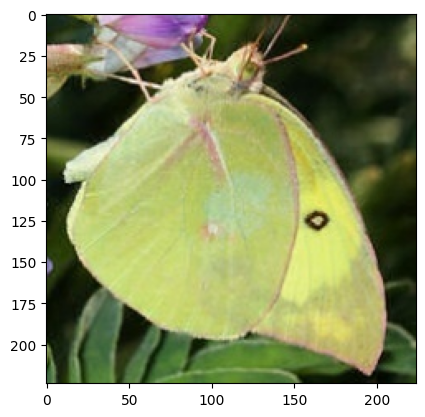

In [8]:
#Visualisation of a random image
test_image=cv2.imread("train/"+"Image_1.jpg")
test=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
plt.imshow(test)
# The butterfly breed is "Southern Dogface"

In [9]:
#Making a dataframe with which incorporates the height and width of the images
Height=[]
width=[]

for image in df["filename"]:
  img=cv2.imread("train/"+ image)
  Height.append(img.shape[0])
  width.append(img.shape[1])

In [10]:
df["Height"]=Height
df["Width"]=width

In [11]:
df.head()

,filename,label,Height,Width
0,Image_1.jpg,SOUTHERN DOGFACE,224,224
1,Image_2.jpg,ADONIS,224,224
2,Image_3.jpg,BROWN SIPROETA,224,224
3,Image_4.jpg,MONARCH,224,224
4,Image_5.jpg,GREEN CELLED CATTLEHEART,224,224


In [12]:
df.describe()

,Height,Width
count,6499.0,6499.0
mean,224.0,224.0
std,0.0,0.0
min,224.0,224.0
25%,224.0,224.0
50%,224.0,224.0
75%,224.0,224.0
max,224.0,224.0


In [13]:
dy=df["label"].value_counts()

In [14]:
dy=dy.reset_index(name='Counts')

In [15]:
dy.head()

,label,Counts
0,MOURNING CLOAK,131
1,SLEEPY ORANGE,107
2,ATALA,100
3,BROWN SIPROETA,99
4,CRECENT,97


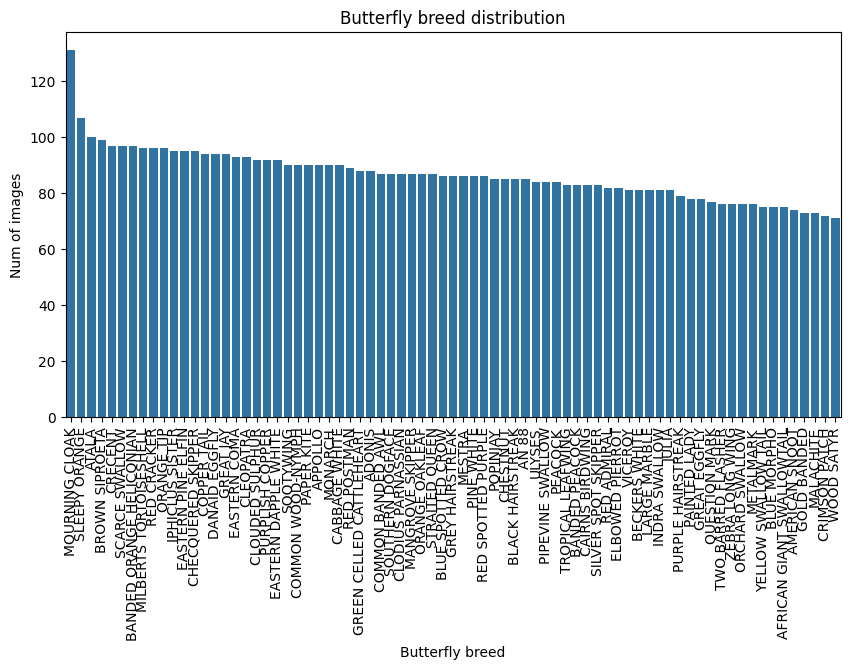

In [16]:
#Distribution of breeds visualised.
plt.figure(figsize=(10,5))
sns.barplot(data=dy,x='label',y='Counts')
plt.title("Butterfly breed distribution")
plt.xlabel("Butterfly breed")
plt.ylabel("Num of images")
plt.xticks(rotation=90)
plt.show()

In [17]:
print(df['label'].unique())
print(len(df['label'].unique()))

['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE HAIRSTREAK' 'ELBOWED PIERROT' 'GREAT EGGFLY' 'ORCHARD 

In [18]:
# Creating a Image Data Generator
idg=tf.keras.preprocessing.image.ImageDataGenerator (rescale=1/255,
                                                    vertical_flip=True,
                                                    horizontal_flip=True,
                                                    rotation_range=30,
                                                    zoom_range=0.2,
                                                    validation_split=0.1)

In [19]:
batch_size=64

In [20]:
train_idg = idg.flow_from_dataframe(
    dataframe=df,
    directory="train/",
    x_col="filename",
    y_col="label",
    batch_size=batch_size,
    target_size=(224, 224),
    class_mode="categorical",
    subset="training")

Found 5850 validated image filenames belonging to 75 classes.


In [21]:
test_idg=idg.flow_from_dataframe(dataframe=df,
                                directory="train/",
                                x_col="filename",
                                y_col="label",
                                batch_size=batch_size,
                                target_size=(224,224),
                                class_mode="categorical",
                                subset="validation")

Found 649 validated image filenames belonging to 75 classes.


In [22]:
#A CNN neural network model
model_cnn=tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Input((224,224,3),name="Input"))
model_cnn.add(tf.keras.layers.Conv2D(filters=16,
                                 padding="valid",
                                 kernel_size=(3,3),
                                 activation="relu",
                                 strides=(1,1),
                                 name="Conv1"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                    strides=(2,2),
                                    padding="valid",
                                    name="pooling1"))
model_cnn.add(tf.keras.layers.Conv2D(filters=32,
                                 padding="valid",
                                 kernel_size=(3,3),
                                 activation="relu",
                                 strides=(1,1),
                                 name="Conv2"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                    strides=(2,2),
                                    padding="valid",
                                    name="pooling2"))
model_cnn.add(tf.keras.layers.Flatten(name="flat"))
model_cnn.add(tf.keras.layers.Dense(128,activation="relu",name="dense1"))
model_cnn.add(tf.keras.layers.Dense(64,activation="relu",name="dense2"))
model_cnn.add(tf.keras.layers.Dense(75,activation="softmax",name="output"))

In [23]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling1 (MaxPooling2D)              │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling2 (MaxPooling2D)              │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flat (Flatten)                       │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 75)                  │           4,875 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,962,283 (45.63 MB)

 Trainable params: 11,962,283 (45.63 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_cnn.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics=["acc"])

In [25]:
 #After 15 epochs the losses are analysed.
model_cnn.fit(
    train_idg,
    epochs=15,
    batch_size=batch_size,
    validation_data=test_idg
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 91s 873ms/step - acc: 0.0163 - loss: 4.3177 - val_acc: 0.0139 - val_loss: 4.2864
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 129s 796ms/step - acc: 0.0187 - loss: 4.2834 - val_acc: 0.0247 - val_loss: 4.2488
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 816ms/step - acc: 0.0282 - loss: 4.2356 - val_acc: 0.0324 - val_loss: 4.2109
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 801ms/step - acc: 0.0459 - loss: 4.1640 - val_acc: 0.0401 - val_loss: 4.1246
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 799ms/step - acc: 0.0544 - loss: 4.0565 - val_acc: 0.0817 - val_loss: 3.9277
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 835ms/step - acc: 0.0831 - loss: 3.8809 - val_acc: 0.1048 - val_loss: 3.7274
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 79s 795ms/step - acc: 0.0989 - loss: 3.6895 - val_acc: 0.1002 - val_loss: 3.5877
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 795ms/step - acc: 0.1140 - loss: 3.5323 - val_acc: 0.1294 - val_loss: 3.4515
Epoch 9/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 813ms/step - acc

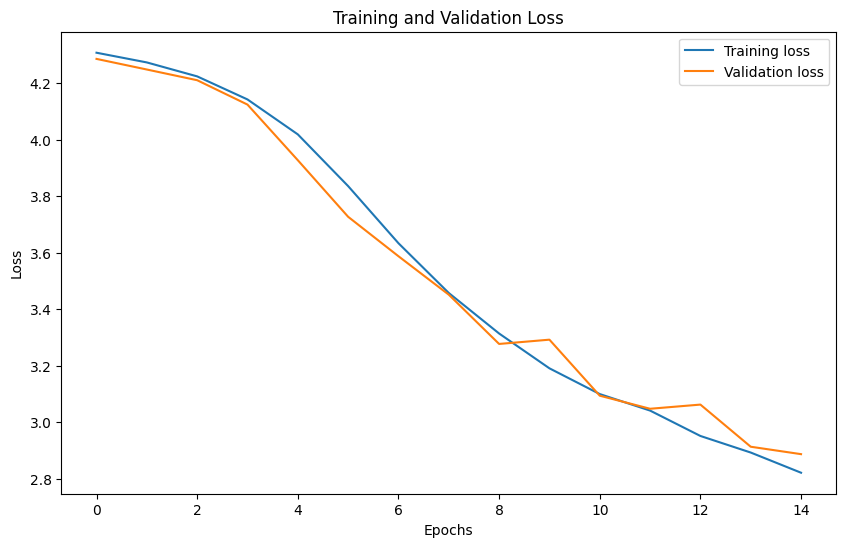

In [26]:
#Visualisation of losses
plt.figure(figsize=(10, 6))
plt.plot(model_cnn.history.history["loss"], label="Training loss")
plt.plot(model_cnn.history.history["val_loss"], label="Validation loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
# testing Dataset
dl=pd.read_csv("Testing_set.csv")

In [28]:
dl.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [29]:
# class maping done
class_map={v:k for k,v in train_idg.class_indices.items()}


In [30]:
class_map

{0: 'ADONIS',
 1: 'AFRICAN GIANT SWALLOWTAIL',
 2: 'AMERICAN SNOOT',
 3: 'AN 88',
 4: 'APPOLLO',
 5: 'ATALA',
 6: 'BANDED ORANGE HELICONIAN',
 7: 'BANDED PEACOCK',
 8: 'BECKERS WHITE',
 9: 'BLACK HAIRSTREAK',
 10: 'BLUE MORPHO',
 11: 'BLUE SPOTTED CROW',
 12: 'BROWN SIPROETA',
 13: 'CABBAGE WHITE',
 14: 'CAIRNS BIRDWING',
 15: 'CHECQUERED SKIPPER',
 16: 'CHESTNUT',
 17: 'CLEOPATRA',
 18: 'CLODIUS PARNASSIAN',
 19: 'CLOUDED SULPHUR',
 20: 'COMMON BANDED AWL',
 21: 'COMMON WOOD-NYMPH',
 22: 'COPPER TAIL',
 23: 'CRECENT',
 24: 'CRIMSON PATCH',
 25: 'DANAID EGGFLY',
 26: 'EASTERN COMA',
 27: 'EASTERN DAPPLE WHITE',
 28: 'EASTERN PINE ELFIN',
 29: 'ELBOWED PIERROT',
 30: 'GOLD BANDED',
 31: 'GREAT EGGFLY',
 32: 'GREAT JAY',
 33: 'GREEN CELLED CATTLEHEART',
 34: 'GREY HAIRSTREAK',
 35: 'INDRA SWALLOW',
 36: 'IPHICLUS SISTER',
 37: 'JULIA',
 38: 'LARGE MARBLE',
 39: 'MALACHITE',
 40: 'MANGROVE SKIPPER',
 41: 'MESTRA',
 42: 'METALMARK',
 43: 'MILBERTS TORTOISESHELL',
 44: 'MONARCH',
 45: 'MOUR

In [31]:
# testing generator made to ffed into the neural network
testing_idg=idg.flow_from_dataframe(dataframe=dl,
                                    directory="test/",
                                    x_col="filename",
                                    batch_size=batch_size,
                                    target_size=(224,224),
                                    class_mode=None,
                                    shuffle=False)

Found 2786 validated image filenames.


In [32]:
predictions=model_cnn.predict(testing_idg)
predicted_classes =np.argmax(predictions,axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 943ms/step


In [33]:
dl["predicted_label"]=predicted_classes

In [34]:
dl.head()

,filename,predicted_label
0,Image_1.jpg,52
1,Image_2.jpg,24
2,Image_3.jpg,50
3,Image_4.jpg,36
4,Image_5.jpg,43


In [35]:
dl['predicted_class_names'] = dl["predicted_label"].map(class_map)

In [36]:
#Predicted class and class names are incorporated in a dataframe
dl.head()

,filename,predicted_label,predicted_class_names
0,Image_1.jpg,52,PINE WHITE
1,Image_2.jpg,24,CRIMSON PATCH
2,Image_3.jpg,50,PAPER KITE
3,Image_4.jpg,36,IPHICLUS SISTER
4,Image_5.jpg,43,MILBERTS TORTOISESHELL


In [37]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/69/Siproeta_epaphus_%288745577479%29.jpg

--2024-08-08 15:44:27--  https://upload.wikimedia.org/wikipedia/commons/6/69/Siproeta_epaphus_%288745577479%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173083 (169K) [image/jpeg]
Saving to: ‘Siproeta_epaphus_(8745577479).jpg’

Siproeta_epaphus_(8 100%[===================>] 169.03K  --.-KB/s    in 0.06s   

2024-08-08 15:44:27 (2.76 MB/s) - ‘Siproeta_epaphus_(8745577479).jpg’ saved [173083/173083]



In [38]:
from PIL import Image
img=Image.open("Siproeta_epaphus_(8745577479).jpg")
img=img.resize((224,224))
img=np.array(img)
img=img/255
img=np.expand_dims(img,axis=0)
prediction=model_cnn.predict(img)
predicted_class=np.argmax(prediction,axis=1)
predicted_class_name=class_map[predicted_class[0]]
print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
IPHICLUS SISTER


In [39]:
vgg_no_top=tf.keras.applications.VGG16(include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
vgg_no_top.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
for layers in vgg_no_top.layers:
  layers.trainable=False
  print(layers.name,layers.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [42]:
flat=tf.keras.layers.Flatten()(vgg_no_top.output)
dense1=tf.keras.layers.Dense(128,activation="relu")(flat)
dense2=tf.keras.layers.Dense(64,activation="relu")(dense1)
output=tf.keras.layers.Dense(75,activation="softmax")(dense2)

In [43]:
final_model=tf.keras.models.Model(inputs=[vgg_no_top.input],outputs=[output])

In [44]:
final_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,939,211 (68.43 MB)

 Trainable params: 3,224,523 (12.30 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
final_model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics=["acc"])

In [46]:
final_model.fit(train_idg,validation_data=test_idg,epochs=15,batch_size=batch_size)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - acc: 0.0139 - loss: 4.3444 - val_acc: 0.0231 - val_loss: 4.3022
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 932ms/step - acc: 0.0252 - loss: 4.2925 - val_acc: 0.0200 - val_loss: 4.2830
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 89s 911ms/step - acc: 0.0317 - loss: 4.2508 - val_acc: 0.0370 - val_loss: 4.2051
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - acc: 0.0456 - loss: 4.1922 - val_acc: 0.0401 - val_loss: 4.1160
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - acc: 0.0782 - loss: 4.0556 - val_acc: 0.0909 - val_loss: 3.9682
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - acc: 0.0989 - loss: 3.9056 - val_acc: 0.0817 - val_loss: 3.9670
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - acc: 0.1404 - loss: 3.6587 - val_acc: 0.1602 - val_loss: 3.5654
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 91s 926ms/step - acc: 0.1711 - loss: 3.4384 - val_acc: 0.2928 - val_loss: 3.0926
Epoch 9/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 905ms/step - acc

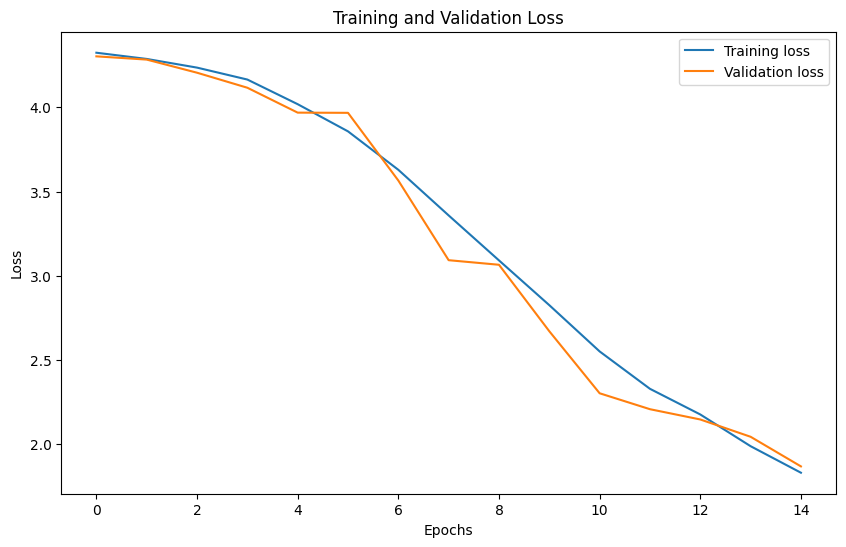

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(final_model.history.history["loss"], label="Training loss")
plt.plot(final_model.history.history["val_loss"], label="Validation loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
predictions_vgg=final_model.predict(testing_idg)
predicted_classes_vgg =np.argmax(predictions,axis=1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step


In [49]:
dl["predicted_label_vgg"]=predicted_classes_vgg
dl["predicted_class_names_vgg"]=dl["predicted_label_vgg"].map(class_map)

In [50]:
dl.head()

,filename,predicted_label,predicted_class_names,predicted_label_vgg,predicted_class_names_vgg
0,Image_1.jpg,52,PINE WHITE,52,PINE WHITE
1,Image_2.jpg,24,CRIMSON PATCH,24,CRIMSON PATCH
2,Image_3.jpg,50,PAPER KITE,50,PAPER KITE
3,Image_4.jpg,36,IPHICLUS SISTER,36,IPHICLUS SISTER
4,Image_5.jpg,43,MILBERTS TORTOISESHELL,43,MILBERTS TORTOISESHELL


In [51]:
value_count_vgg=dl["predicted_class_names_vgg"].value_counts().reset_index()

In [52]:
value_count_cnn=dl["predicted_class_names"].value_counts().reset_index()

In [53]:
value_count_vgg

,predicted_class_names_vgg,count
0,TROPICAL LEAFWING,202
1,ATALA,158
2,CHECQUERED SKIPPER,133
3,SLEEPY ORANGE,125
4,AN 88,122
...,...,...
61,JULIA,3
62,MANGROVE SKIPPER,2
63,CLODIUS PARNASSIAN,1
64,ORCHARD SWALLOW,1


In [54]:
value_count_cnn

,predicted_class_names,count
0,TROPICAL LEAFWING,202
1,ATALA,158
2,CHECQUERED SKIPPER,133
3,SLEEPY ORANGE,125
4,AN 88,122
...,...,...
61,JULIA,3
62,MANGROVE SKIPPER,2
63,CLODIUS PARNASSIAN,1
64,ORCHARD SWALLOW,1


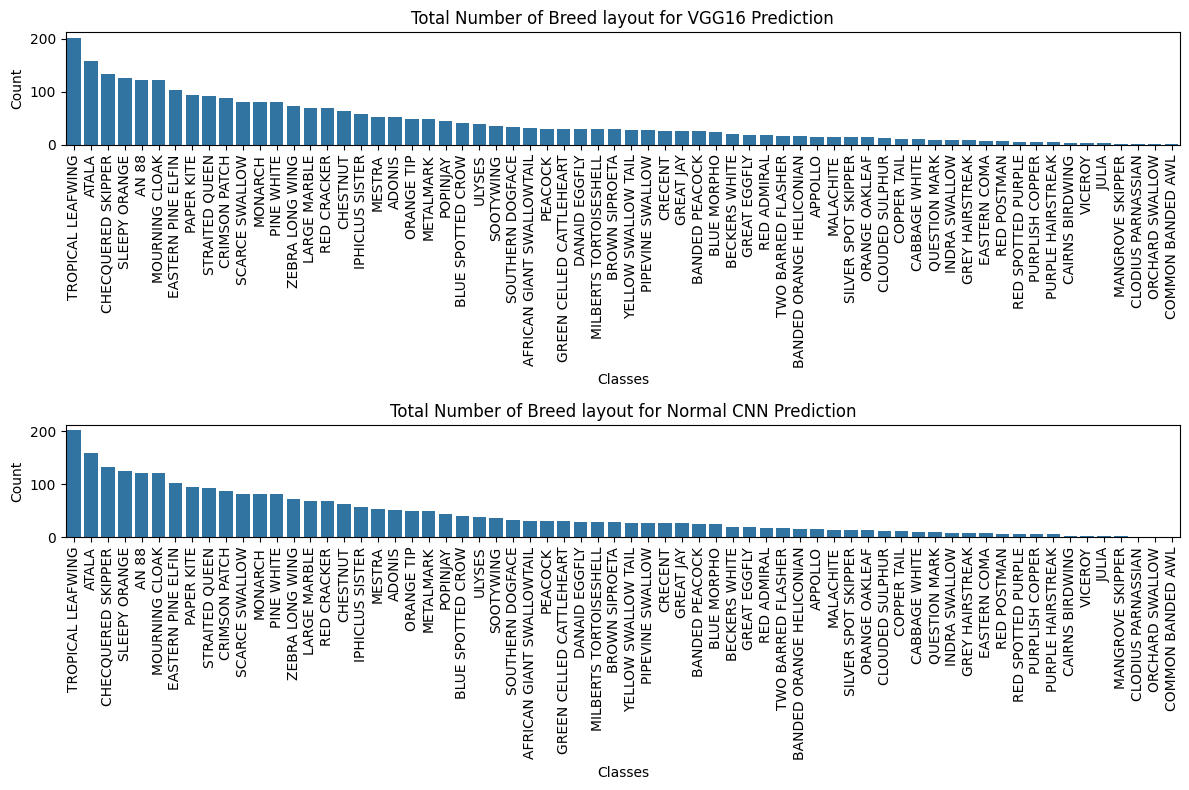

In [55]:
plt.figure(figsize=(12, 8))

# First subplot
plt.subplot(2, 1, 1)
sns.barplot(data=value_count_vgg,x="predicted_class_names_vgg",y="count")
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Total Number of Breed layout for VGG16 Prediction')

# Second subplot
plt.subplot(2, 1, 2)
sns.barplot(data=value_count_cnn,x="predicted_class_names",y="count")
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Total Number of Breed layout for Normal CNN Prediction')

plt.tight_layout()
plt.show()

# As seen from the distribution both the approches( VGG16 and Normal CNN) has the same kind of result for this case.

In [56]:
#Applying ensemble technique

In [57]:
#Input Layer
input=tf.keras.layers.Input((224,224,3),name='inputlayer')
# Preprocessing in  layer
vgg_pre_pro=tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input,name="vggprepro")(input)
# downloading vgg no top model
vgg_notop=tf.keras.applications.VGG16(include_top=False,input_shape=(224,224,3))
vgg_notop.trainable=False

# model in a Layer
vgg=vgg_notop(vgg_pre_pro)

#Global average pooling
vgg_gap=tf.keras.layers.GlobalAveragePooling2D(name="vgggap")(vgg)

#Preprocessing in layer
rest_pre=tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input,name="restnetprepro")(input)

#Downloading resnet no top
rest_notop=tf.keras.applications.ResNet50(include_top=False,input_shape=(224,224,3))
rest_notop.trainable=False

#Model in a layer
rest=rest_notop(rest_pre)

#Global average pooling
rest_gap=tf.keras.layers.GlobalAveragePooling2D(name="Restgap")(rest)

#preprocessing in layer
incep_pre_pro=tf.keras.layers.Lambda(tf.keras.applications.inception_v3.preprocess_input,name="inceptionprepro")(input)

#Download the Inception no top model
incep_notop=tf.keras.applications.InceptionV3(include_top=False,input_shape=(224,224,3))
incep_notop.trainable=False

#Model in a layer
incep=incep_notop(incep_pre_pro)

#Global average pooling
incep_gap=tf.keras.layers.GlobalAveragePooling2D(name="incepgap")(incep)

#conca,
concat=tf.keras.layers.Concatenate(name="concat")([vgg_gap,rest_gap,incep_gap])
dense=tf.keras.layers.Dense(256,activation="relu",name="Dense")(concat)
output=tf.keras.layers.Dense(75,activation="softmax",name="Output")(dense)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [58]:
final_model1=tf.keras.models.Model(inputs=[input],outputs=[output])

In [59]:
final_model1.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inputlayer (InputLayer)   │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vggprepro (Lambda)        │ (None, 224, 224, 3)    │              0 │ inputlayer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ restnetprepro (Lambda)    │ (None, 224, 224, 3)    │              0 │ inputlayer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inceptionprepro (Lambda)  │ (None, 224, 224, 3)    │              0 │ inputlayer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ vggprepro[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ restnetprepro[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inception_v3 (Functional) │ (None, 5, 5, 2048)     │     21,802,784 │ inceptionprepro[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgggap                    │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Restgap                   │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ incepgap                  │ (None, 2048)           │              0 │ inception_v3[0][0]     │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concat (Concatenate)      │ (None, 4608)           │              0 │ vgggap[0][0],          │
│                           │                        │                │ Restgap[0][0],         │
│                           │                        │                │ incepgap[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Dense (Dense)             │ (None, 256)            │      1,179,904 │ concat[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output (Dense)            │ (None, 75)             │         19,275 │ Dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 61,304,363 (233.86 MB)

 Trainable params: 1,199,179 (4.57 MB)

 Non-trainable params: 60,105,184 (229.28 MB)

In [60]:
final_model1.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics=["acc"])

In [61]:
final_model1.fit(train_idg,epochs=15,batch_size=64,validation_data=test_idg)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - acc: 0.0134 - loss: 4.3866 - val_acc: 0.0324 - val_loss: 4.3038
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - acc: 0.0168 - loss: 4.3061 - val_acc: 0.0231 - val_loss: 4.2950
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - acc: 0.0293 - loss: 4.2973 - val_acc: 0.0385 - val_loss: 4.2717
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - acc: 0.0347 - loss: 4.2822 - val_acc: 0.0431 - val_loss: 4.2587
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - acc: 0.0460 - loss: 4.2644 - val_acc: 0.0539 - val_loss: 4.2497
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - acc: 0.0418 - loss: 4.2507 - val_acc: 0.0324 - val_loss: 4.2301
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - acc: 0.0478 - loss: 4.2268 - val_acc: 0.0616 - val_loss: 4.2006
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - acc: 0.0490 - loss: 4.1995 - val_acc: 0.0524 - val_loss: 4.1857
Epoch 9/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - acc: 0.0553

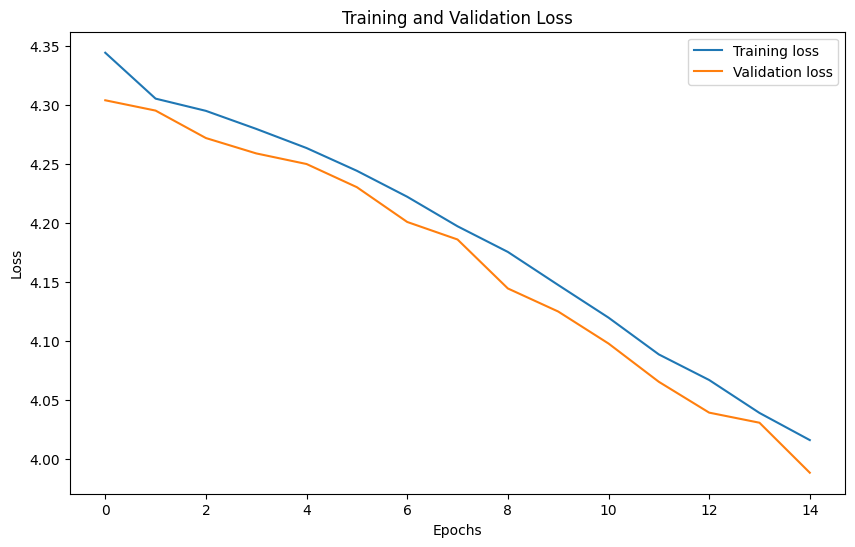

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(final_model1.history.history["loss"], label="Training loss")
plt.plot(final_model1.history.history["val_loss"], label="Validation loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
predictions_ensemble=final_model1.predict(testing_idg)
predicted_classes_ensemble =np.argmax(predictions,axis=1)
dl["predicted_label_ensemble"]=predicted_classes_vgg
dl["predicted_class_names_ensemble"]=dl["predicted_label_ensemble"].map(class_map)

44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step


In [65]:
dl.head()

,filename,predicted_label,predicted_class_names,predicted_label_vgg,predicted_class_names_vgg,predicted_label_ensemble,predicted_class_names_ensemble
0,Image_1.jpg,52,PINE WHITE,52,PINE WHITE,52,PINE WHITE
1,Image_2.jpg,24,CRIMSON PATCH,24,CRIMSON PATCH,24,CRIMSON PATCH
2,Image_3.jpg,50,PAPER KITE,50,PAPER KITE,50,PAPER KITE
3,Image_4.jpg,36,IPHICLUS SISTER,36,IPHICLUS SISTER,36,IPHICLUS SISTER
4,Image_5.jpg,43,MILBERTS TORTOISESHELL,43,MILBERTS TORTOISESHELL,43,MILBERTS TORTOISESHELL


In [66]:
value_count_ensemble=dl["predicted_class_names_ensemble"].value_counts().reset_index()

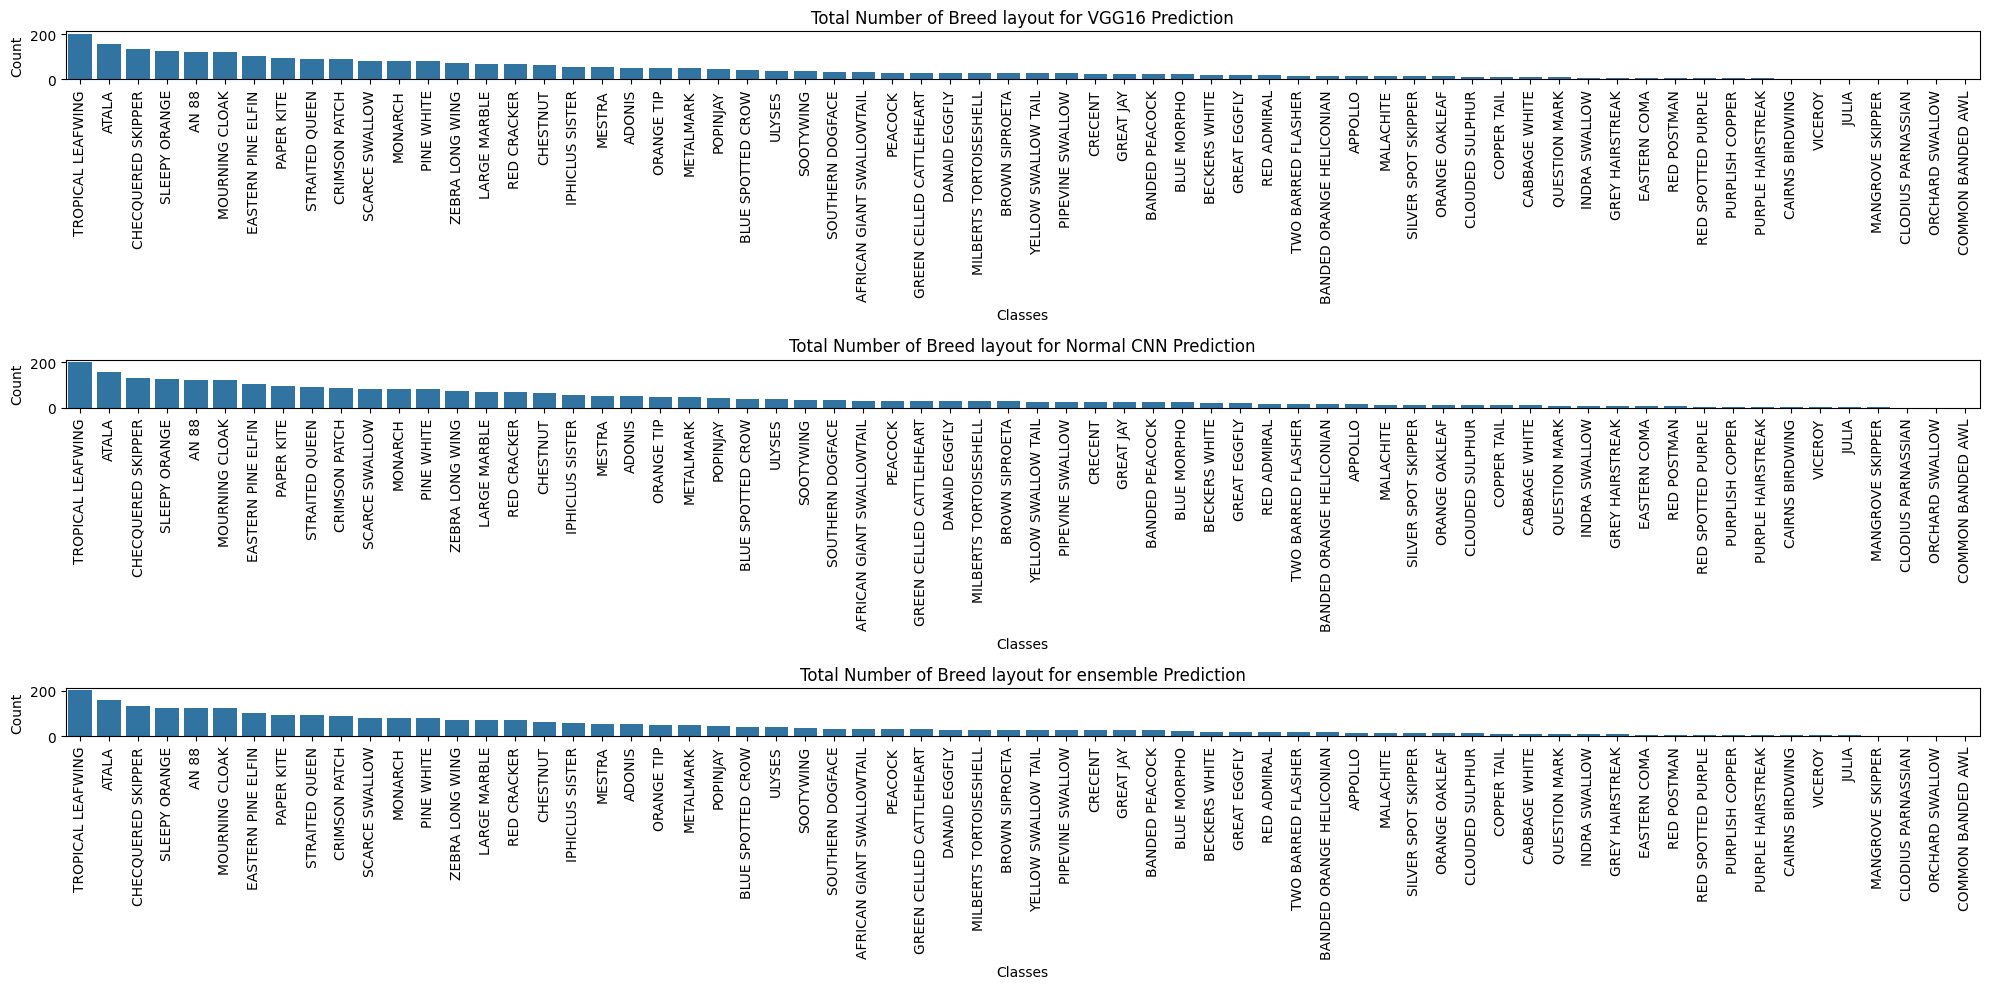

In [68]:
plt.figure(figsize=(20, 10))

# First subplot
plt.subplot(3, 1, 1)
sns.barplot(data=value_count_vgg,x="predicted_class_names_vgg",y="count")
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Total Number of Breed layout for VGG16 Prediction')

# Second subplot
plt.subplot(3, 1, 2)
sns.barplot(data=value_count_cnn,x="predicted_class_names",y="count")
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Total Number of Breed layout for Normal CNN Prediction')

# Second subplot
plt.subplot(3, 1, 3)
sns.barplot(data=value_count_ensemble,x="predicted_class_names_ensemble",y="count")
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Total Number of Breed layout for ensemble Prediction')

plt.tight_layout()
plt.show()

In [73]:
!wget https://www.butterfliesandmoths.org/sites/default/files/bamona_images/crimson_patch_-_tx.jpg

--2024-08-08 17:02:30--  https://www.butterfliesandmoths.org/sites/default/files/bamona_images/crimson_patch_-_tx.jpg
Resolving www.butterfliesandmoths.org (www.butterfliesandmoths.org)... 45.33.32.33, 2600:3c01::f03c:93ff:fed8:d561
Connecting to www.butterfliesandmoths.org (www.butterfliesandmoths.org)|45.33.32.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1418867 (1.4M) [image/jpeg]
Saving to: ‘crimson_patch_-_tx.jpg’

crimson_patch_-_tx. 100%[===================>]   1.35M  7.65MB/s    in 0.2s    

2024-08-08 17:02:31 (7.65 MB/s) - ‘crimson_patch_-_tx.jpg’ saved [1418867/1418867]



In [77]:
from PIL import Image
img=Image.open("crimson_patch_-_tx.jpg")
img=img.resize((224,224))
img=np.array(img)
img=img/255
img=np.expand_dims(img,axis=0)
prediction=model_cnn.predict(img)
predicted_class=np.argmax(prediction,axis=1)
predicted_class_name=class_map[predicted_class[0]]
print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
AN 88


In [75]:
from PIL import Image
img=Image.open("crimson_patch_-_tx.jpg")
img=img.resize((224,224))
img=np.array(img)
img=img/255
img=np.expand_dims(img,axis=0)
prediction=final_model.predict(img)
predicted_class=np.argmax(prediction,axis=1)
predicted_class_name=class_map[predicted_class[0]]
print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
CAIRNS BIRDWING


In [76]:
from PIL import Image
img=Image.open("crimson_patch_-_tx.jpg")
img=img.resize((224,224))
img=np.array(img)
img=img/255
img=np.expand_dims(img,axis=0)
prediction=final_model1.predict(img)
predicted_class=np.argmax(prediction,axis=1)
predicted_class_name=class_map[predicted_class[0]]
print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
ELBOWED PIERROT


In [79]:
# The Resukt of the CNN , VGG16 and ensemble technique are similar,
#the image of a crimson patch butterfly  is taken from the internet and fed through these networks ,
#whcih gave wrong answers for every model  for this image.